<a href="https://colab.research.google.com/github/MEskerod/RNA_UNET/blob/main/data/RNAUnet_experiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, pickle, tarfile, sys, shutil

from collections import namedtuple

import pandas as pd

In [3]:
sys.path.append('/content/drive/MyDrive')
import utils

# Functions

## For plotting data

## For experiment

In [4]:
def test_inputs(tar_path, output_file = None, df = None):
  RNA_data = namedtuple('RNA_data', 'input output length family name pairs')

  if df is None:
    df = pd.DataFrame(columns=["Training_loss", "Training_f1", "Validation_loss", "Validation_f1"])

  print("Load files...")
  with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall('/content')

  data_path = os.path.join('data', os.path.splitext(os.path.splitext(os.path.basename(tar_path))[0])[0])

  print("Splitting data...")
  file_list = [os.path.join(data_path, file) for file in os.listdir(data_path)]
  family_map = utils.make_family_map(file_list)

  train, valid, test = utils.split_data(file_list, validation_ratio=0.2, test_ratio=0.0)

  input_type = pickle.load(open(train[0], 'rb')).input.size(dim=0)

  print(f"Training with {input_type}-channel input...")

  # Define your train_dataset and validation_dataset
  train_dataset = utils.ImageToImageDataset(train, family_map)
  validation_dataset = utils.ImageToImageDataset(valid, family_map)

  model = utils.RNA_Unet(in_channels = input_type)

  train_loss, train_f1, valid_loss, valid_f1, _ = utils.fit_model(
        model,
        train_dataset,
        validation_dataset,
        epochs=10,
        lr = 0.01
        #plots = False
    )

  df.loc[f"{input_type}-channels"] = [train_loss, train_f1, valid_loss, valid_f1]

  if output_file:
    df.to_csv(output_file)

  shutil.rmtree(os.path.join('/content', data_path))

  print(f"Finished training {input_type}-channel input\n")

  return df


# Data

In [5]:
RNA_data = namedtuple('RNA_data', 'input output length family name pairs')

# Experiment

Load files...
Training with 8-channel input...


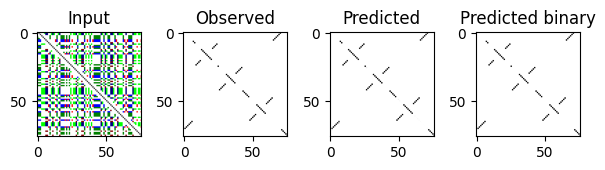

Epoch [1/10], Loss: 0.0057, Validation: 0.0121


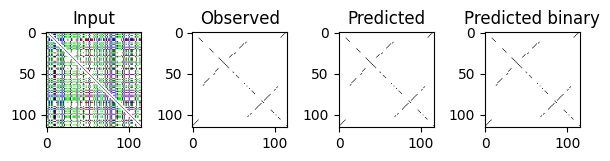

Epoch [2/10], Loss: 0.0027, Validation: 0.0086


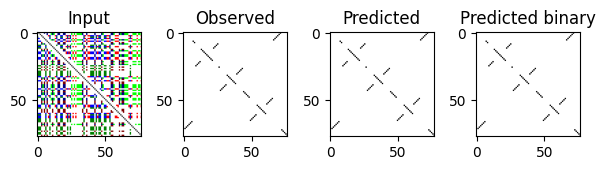

Epoch [3/10], Loss: 0.0021, Validation: 0.0118


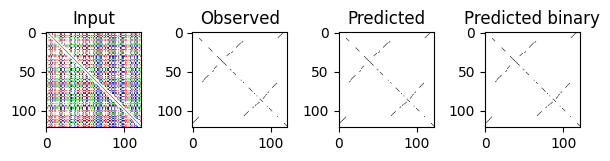

Epoch [4/10], Loss: 0.0017, Validation: 0.0091


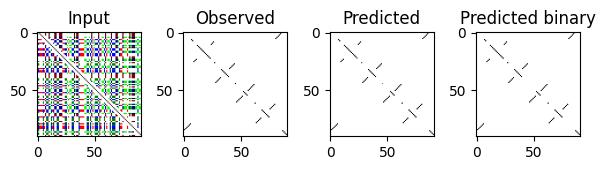

Epoch [5/10], Loss: 0.0015, Validation: 0.0083


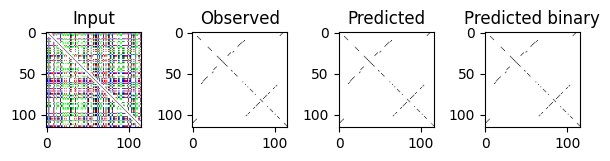

Epoch [6/10], Loss: 0.0013, Validation: 0.0093


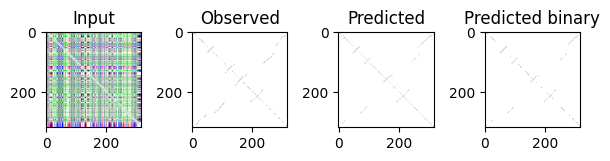

Epoch [7/10], Loss: 0.0011, Validation: 0.01


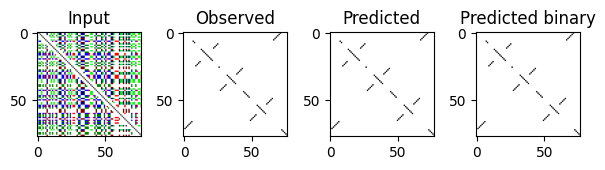

Epoch [8/10], Loss: 0.001, Validation: 0.012


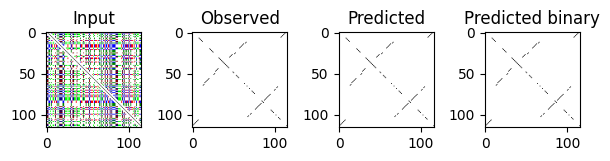

Epoch [9/10], Loss: 0.0009, Validation: 0.0133


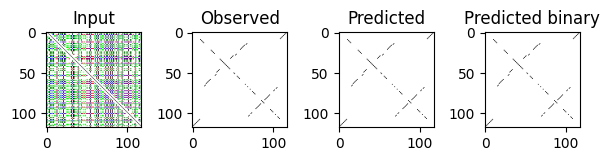

Epoch [10/10], Loss: 0.0008, Validation: 0.0155


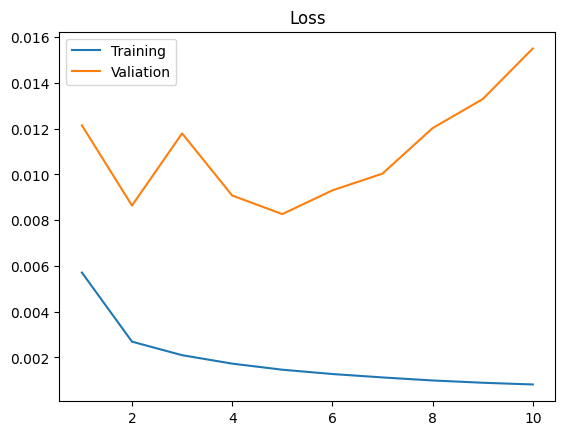

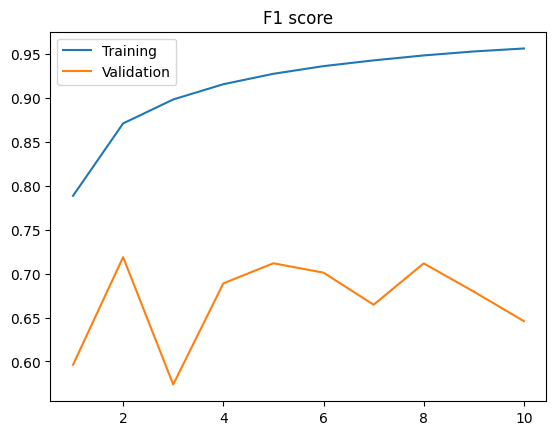

Finished training 8-channel input



In [8]:
df = test_inputs('/content/drive/MyDrive/data/experiment8.tar.gz', output_file = '/content/drive/MyDrive/results/RNAunet_experiment1.csv')

Load files...
Training with 9-channel input...


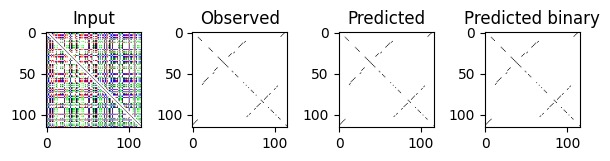

Epoch [1/10], Loss: 0.0049, Validation: 0.0081


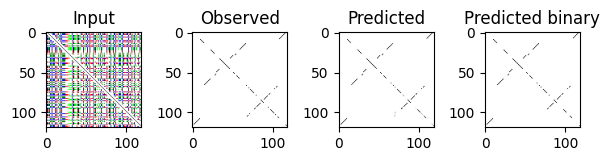

Epoch [2/10], Loss: 0.0026, Validation: 0.0088


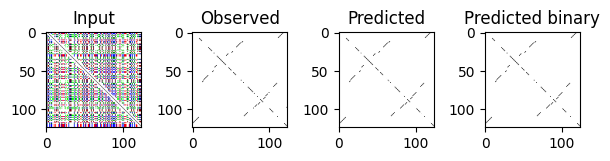

Epoch [3/10], Loss: 0.002, Validation: 0.006


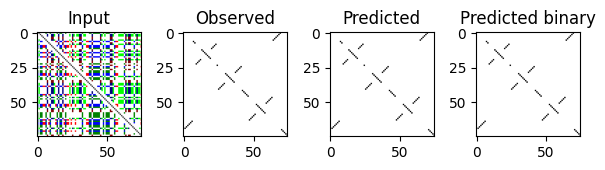

Epoch [4/10], Loss: 0.0016, Validation: 0.0095


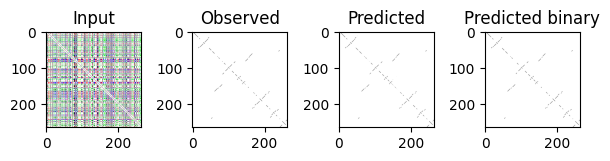

Epoch [5/10], Loss: 0.0014, Validation: 0.0131


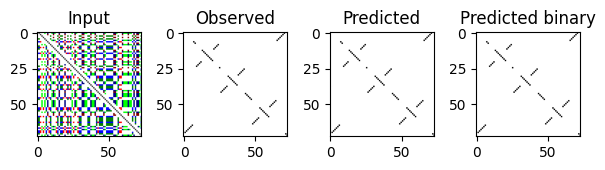

Epoch [6/10], Loss: 0.0012, Validation: 0.0131


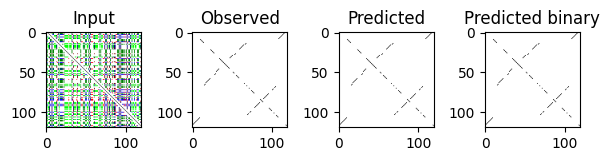

Epoch [7/10], Loss: 0.001, Validation: 0.018


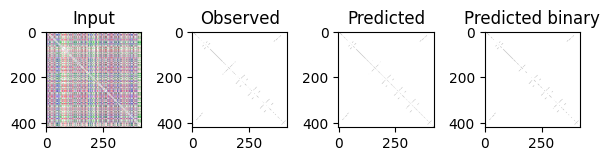

Epoch [8/10], Loss: 0.0009, Validation: 0.0284


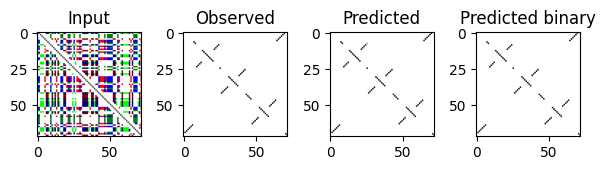

Epoch [9/10], Loss: 0.0008, Validation: 0.0227


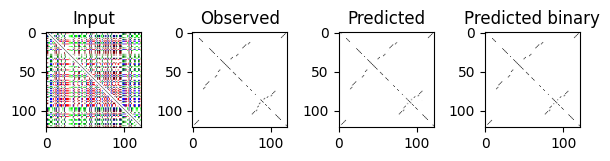

Epoch [10/10], Loss: 0.0008, Validation: 0.0168


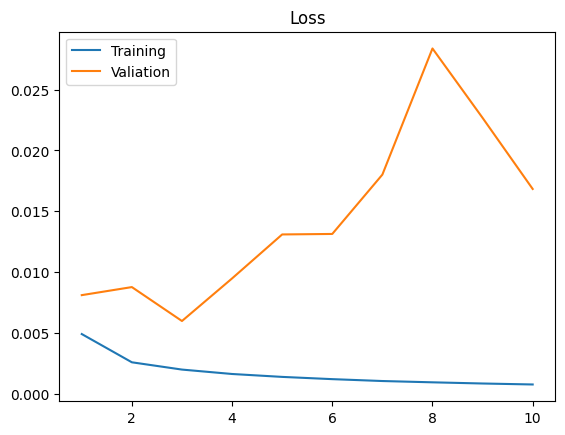

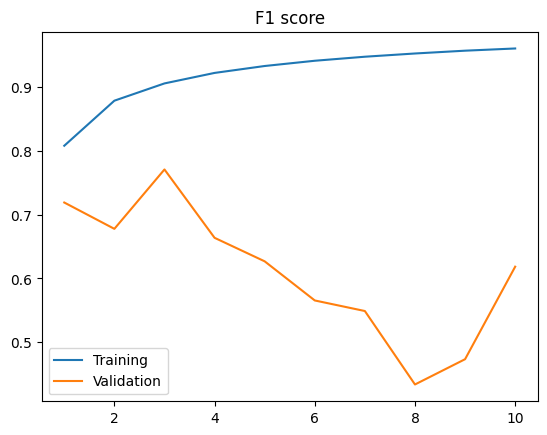

Finished training 9-channel input



In [11]:
df = test_inputs('/content/drive/MyDrive/data/experiment9.tar.gz', output_file = '/content/drive/MyDrive/results/RNAunet_experiment1.csv', df = df)

Load files...
Training with 17-channel input...


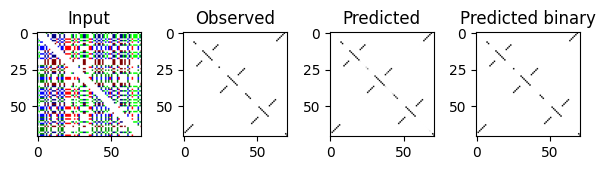

Epoch [1/10], Loss: 0.0055, Validation: 0.0137


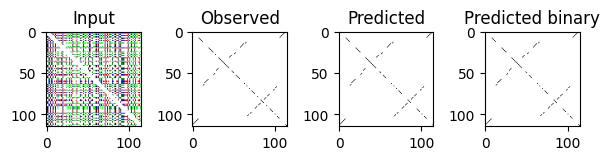

Epoch [2/10], Loss: 0.0025, Validation: 0.0137


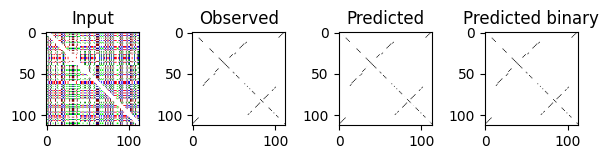

Epoch [3/10], Loss: 0.002, Validation: 0.0146


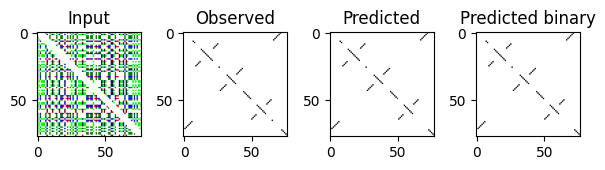

Epoch [4/10], Loss: 0.0016, Validation: 0.0124


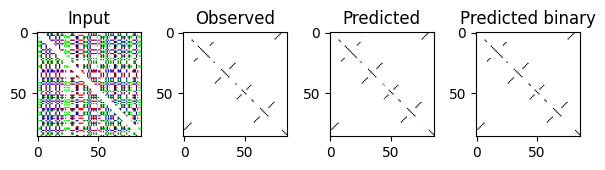

Epoch [5/10], Loss: 0.0014, Validation: 0.0139


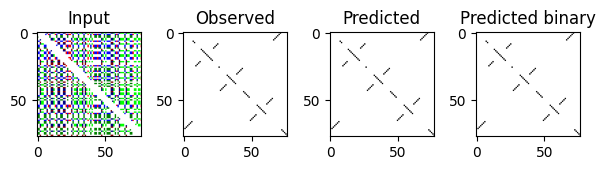

Epoch [6/10], Loss: 0.0012, Validation: 0.0091


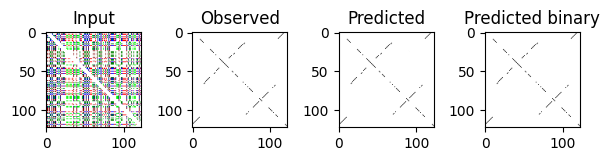

Epoch [7/10], Loss: 0.0011, Validation: 0.0117


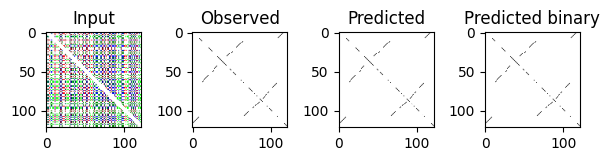

Epoch [8/10], Loss: 0.0009, Validation: 0.0168


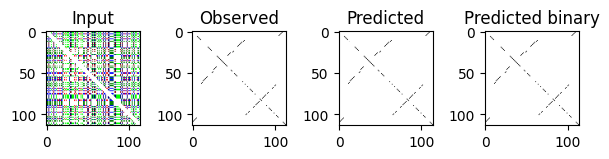

Epoch [9/10], Loss: 0.0008, Validation: 0.0135


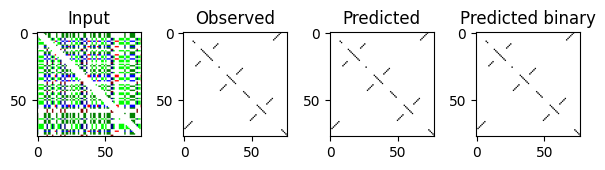

Epoch [10/10], Loss: 0.0008, Validation: 0.0151


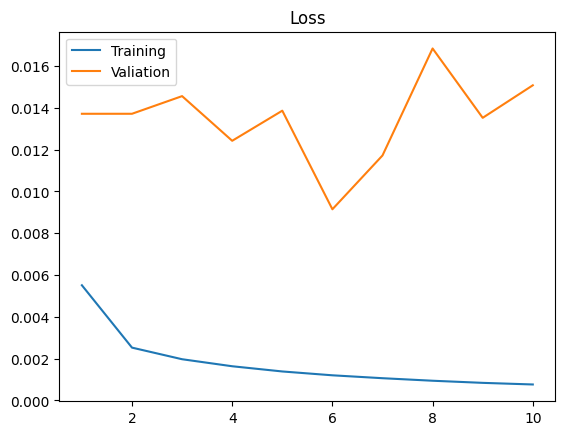

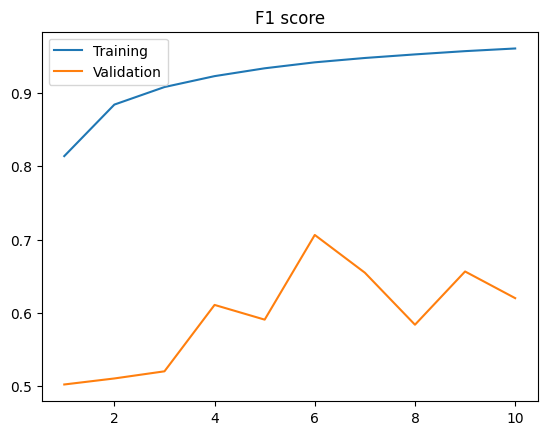

Finished training 17-channel input



In [9]:
df = test_inputs('/content/drive/MyDrive/data/experiment17.tar.gz', output_file = '/content/drive/MyDrive/results/RNAunet_experiment1.csv', df = df)

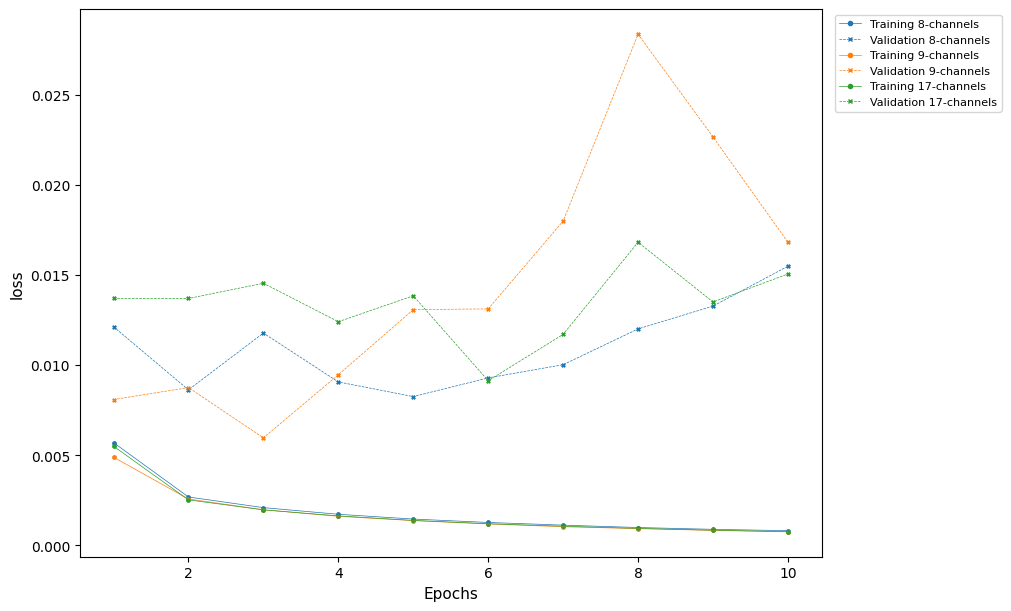

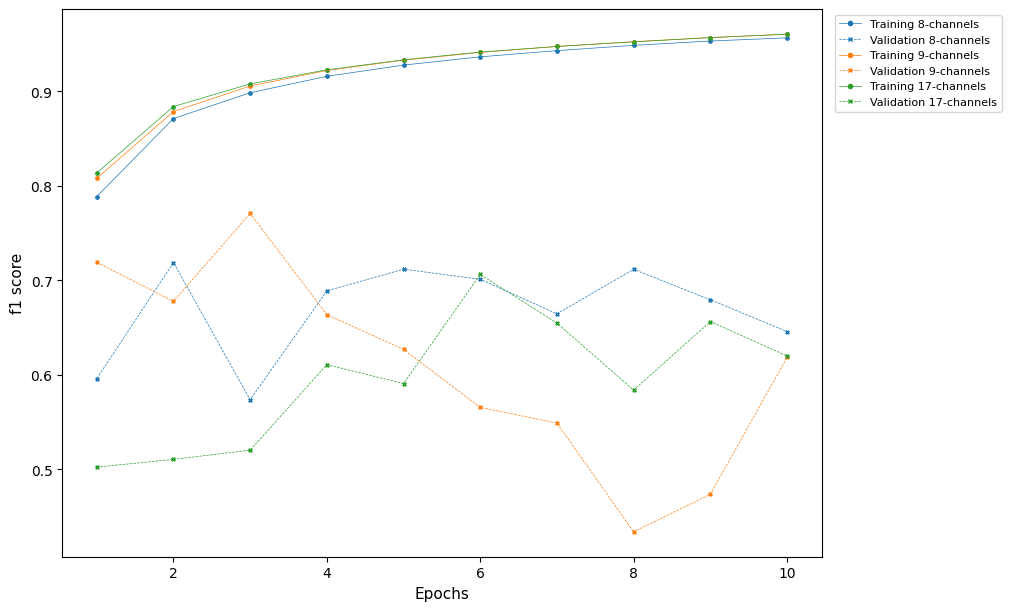

In [10]:
utils.plot_loss_curves(df, output_file = '/content/drive/MyDrive/figures/RNAunet_experiment1_loss.png')
utils.plot_f1_curves(df, output_file = '/content/drive/MyDrive/figures/RNAunet_experiment1_f1.png')